# Water Quality Analysis

Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning.

One of the main areas of research in machine learning is the analysis of water quality. It is also known as water potability analysis because our task here is to understand all the factors that affect water potability and train a machine learning model that can classify whether a specific water sample is safe or unfit for consumption.

For the water quality analysis task, I will be using a Kaggle dataset that contains data on all of the major factors that affect the potability of water. All of the factors that affect water quality are very important, so we need to briefly explore each feature of this dataset before training a machine learning model to predict whether a water sample is safe or unsuitable for consumption. 

In [4]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

In [5]:
#Importing data
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
#Describe the data
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
#Types of data
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [10]:
#Check the data

data.isnull()
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
#Compliting the null values for the median value of the dataset

data['ph'].fillna(data['ph'].dropna().median(), inplace=True)
data['Sulfate'].fillna(data['Sulfate'].dropna().median(), inplace=True)
data['Trihalomethanes'].fillna(data['Trihalomethanes'].dropna().median(), inplace=True)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
#Check the data

data.isnull()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
#checking the class distribution of target variable
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

The dataset is unbalancing, there are more values of no potable water.

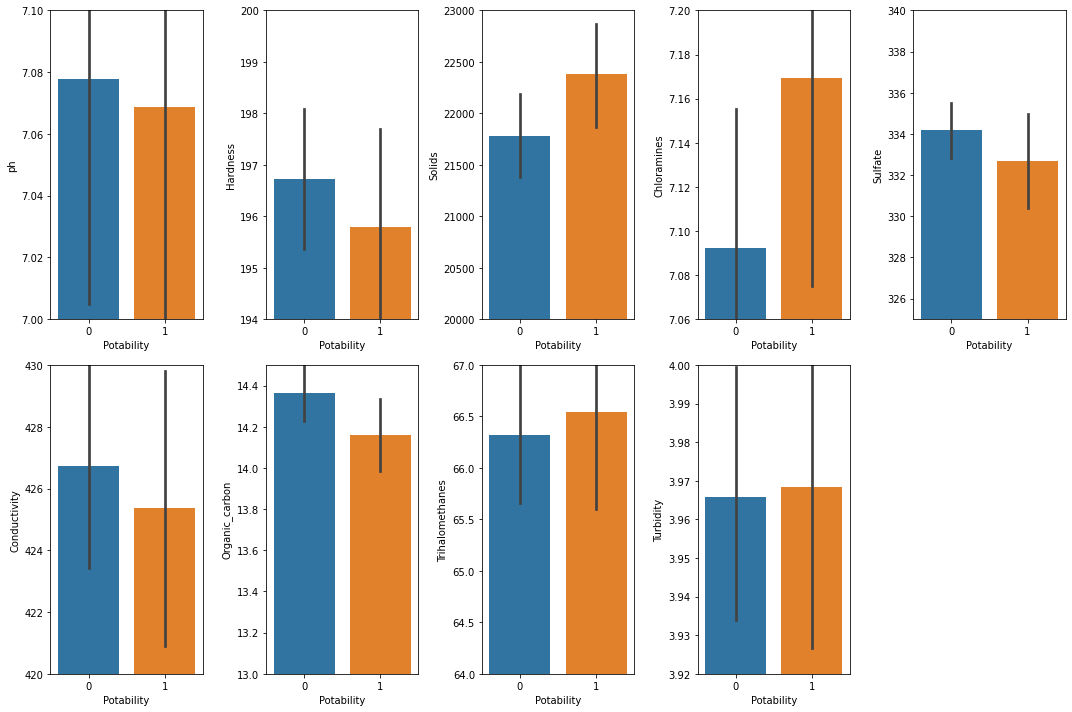

In [15]:
#Plotting out the data
import pylab
import seaborn as sns

fig = plt.figure(figsize=(15,10))
plt.subplot(2,5,1)
sns.barplot(x='Potability',y='ph',data=data)
plt.ylim(7, 7.1)

plt.subplot(2,5,2)
sns.barplot(x='Potability',y='Hardness',data=data)
plt.ylim(194, 200)

plt.subplot(2,5,3)
sns.barplot(x='Potability',y='Solids',data=data)
plt.ylim(20000, 23000)

plt.subplot(2,5,4)
sns.barplot(x='Potability',y='Chloramines',data=data)
plt.ylim(7.06, 7.2)

plt.subplot(2,5,5)
sns.barplot(x='Potability',y='Sulfate',data=data)
plt.ylim(325, 340)

plt.subplot(2,5,6)
sns.barplot(x='Potability',y='Conductivity',data=data)
plt.ylim(420, 430)

plt.subplot(2,5,7)
sns.barplot(x='Potability',y='Organic_carbon',data=data)
plt.ylim(13, 14.5)

plt.subplot(2,5,8)
sns.barplot(x='Potability',y='Trihalomethanes',data=data)
plt.ylim(64, 67)

plt.subplot(2,5,9)
sns.barplot(x='Potability',y='Turbidity',data=data)
plt.ylim(3.92, 4)

plt.tight_layout()

In [16]:
#Checking the correlation

corr_df = data.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


In [17]:
#Checking correlation again between columns.

data.corr()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003014
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64

##### We have a low correlation between the features with the target

But We have this statementes:
1. The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5.

2. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. 

3. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized.

4. Chloramine and chlorine are disinfectants used in public water systems.

5. hey are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink.

6. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable.

7. Organic carbon comes from the breakdown of natural organic materials and synthetic sources. Water containing less than 25 milligrams of organic carbon is considered safe to drink.

8. THMs (Trihalomethanes) are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink.

9. The turbidity of water depends on the number of solids present in suspension. Water with a turbidity of fewer than 5 milligrams is considered drinkable.

## Balancing the two classes. Re-sampling

In [33]:
#checking the class distribution of target variable
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [35]:
Potable = data[data['Potability']==1]
No_Potable = data[data['Potability']==0]

No_Potable = No_Potable.sample(frac=1)
No_Potable = No_Potable[:len(Potable)]

new_df = pd.concat([Potable,No_Potable])
new_df = new_df.sample(frac=1)
new_df.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1393,7.036752,202.886990,24518.574297,7.217408,360.154113,492.352061,16.743289,72.710127,4.174569,0
1498,7.036752,184.786038,18113.017302,8.319080,381.513212,530.248387,19.385941,70.957565,3.077035,1


In [37]:
new_df['Potability'].value_counts()

0    1278
1    1278
Name: Potability, dtype: int64

## Water Quality Prediction Model using Python

In the above section, we explored all the features that affect water quality. Now, the next step is to train a machine learning model for the task of water quality analysis using Python. For this task, I will be using the PyCaret library in Python. 

### Now below is how you can see which machine learning algorithm is best for this dataset by using the PyCaret library in Python:

In [38]:
from pycaret.classification import *
from collections.abc import Iterable
import lightgbm as lgb

clf = setup(new_df, target = "Potability", session_id = 786)
best = compare_models()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2556, 10)"
4,Transformed data shape,"(2556, 10)"
5,Transformed train set shape,"(1789, 10)"
6,Transformed test set shape,"(767, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6244,0.6890,0.5397,0.6521,0.5894,0.2489,0.2536,0.0240
rf,Random Forest Classifier,0.6177,0.6662,0.5811,0.6277,0.6029,0.2355,0.2365,0.2850
lightgbm,Light Gradient Boosting Machine,0.6149,0.6678,0.5955,0.6213,0.6075,0.2299,0.2306,0.0790
et,Extra Trees Classifier,0.6054,0.6637,0.5553,0.6175,0.5841,0.2109,0.2122,0.1870
gbc,Gradient Boosting Classifier,0.6037,0.6506,0.5587,0.6149,0.5850,0.2075,0.2087,0.2390
nb,Naive Bayes,0.5774,0.6097,0.4604,0.6047,0.5212,0.1551,0.1608,0.0260
dt,Decision Tree Classifier,0.5551,0.5551,0.5610,0.5547,0.5570,0.1103,0.1106,0.0310
ada,Ada Boost Classifier,0.5254,0.5653,0.4513,0.5304,0.4863,0.0509,0.0517,0.1400
lr,Logistic Regression,0.5087,0.5260,0.4938,0.5090,0.5010,0.0174,0.0174,0.9980
ridge,Ridge Classifier,0.5036,0.0000,0.5084,0.5043,0.5059,0.0073,0.0073,0.0240


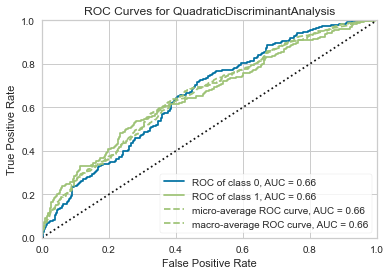

In [39]:
plot_model(best)

In [40]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

According to the above result, the Quadratic Discriminant Analysis algorithm is best for training a machine learning model for the task of water quality analysis. 
So let’s train the model and examine its predictions:

## PREDICTIVE MODEL: QDA

In [41]:
#Splitting the data in train and test.
from sklearn.model_selection import train_test_split

X = new_df.drop('Potability',axis=1) 
Y = new_df['Potability']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)



In [42]:
#Importing the model QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,Y_train)
Y_pred = qda.predict(X_test)

In [43]:
acc_QDA = accuracy_score(Y_test,Y_pred)
acc_QDA

0.609375

In [44]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[183  64]
 [136 129]]


In [46]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(Y_test,Y_pred))
#precision score
print("precision:", metrics.precision_score(Y_test,Y_pred))
#recall score
print("recall" , metrics.recall_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

acuracy: 0.609375
precision: 0.6683937823834197
recall 0.4867924528301887
              precision    recall  f1-score   support

           0       0.57      0.74      0.65       247
           1       0.67      0.49      0.56       265

    accuracy                           0.61       512
   macro avg       0.62      0.61      0.60       512
weighted avg       0.62      0.61      0.60       512



## Summary

So this is how you can analyze the quality of water and train a machine learning model to classify safe and unsafe water for drinking. Access to safe drinking water is one of the essential needs of all human beings. From a legal point of view, access to drinking water is one of the fundamental human rights. Many factors affect water quality, it is also one of the major research areas in machine learning.